In [33]:
import numpy as np

import pandas as pd
print(pd.__version__)
from IPython.display import display

from scipy.optimize import curve_fit
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
%matplotlib widget
colors = plt.get_cmap('summer',20)
# prop_cycle = plt.rcParams['axes.prop_cycle']
# colors = prop_cycle.by_key()['color']

2.1.0


In [34]:
df = pd.read_csv("frg_norm_hssm.csv")
trial_time = 3
stress_dict = {1:'pre',2:'post'}
tt_dict = {5:'short',20:'long'}
leave_resp_filt = df["response"]==0

In [35]:
df["subj_idx"].unique()

array([45194, 45436, 43000,  7873, 48195, 31730, 47204, 45528, 47678,
       42949, 42656, 47131, 46221, 26383, 44070, 47324, 45320, 45956,
       44320, 41645, 43173, 44280, 48276, 43650, 45551, 41302, 45295,
       15089, 48031])

In [36]:
# def neg_exp_resp(x,a,b):
#     return a*(1-np.exp(-b*x))

# def cum_rew_func(df,subid,stress_cond,tt_cond,ax,c):
#     subid_filt = df["subj_idx"]==subid
    
# #   #Correcting for abrupt tt_cond changes:
#     patch_leave_idx = pd.Index(df[subid_filt & leave_resp_filt].index)
#     patch_entry_idx = pd.Index([df[subid_filt].index[0]]+list(patch_leave_idx+1))
#     patch_trial_idx = [list(range(i,j+1)) for (i,j) in list(zip(patch_entry_idx,patch_leave_idx))]
#     for idxs in patch_trial_idx:
#         if len(df.loc[idxs]["travel_time"].unique())>1:
#             df.loc[idxs,"travel_time"] = df.loc[idxs[-1],"travel_time"]
# #             df.at[idxs,"travel_time"] = df.loc[idxs[-1]]["travel_time"]

#     stress_filt = df["condition"]==stress_cond
#     tt_filt = df["travel_time"]==tt_cond

#     patch_leave_idx = pd.Index(df[subid_filt & stress_filt & tt_filt & leave_resp_filt].index)
#     patch_entry_idx = pd.Index([df[subid_filt & stress_filt & tt_filt].index[0]]+list(patch_leave_idx+1))
#     patch_trial_idx = [list(range(i,j+1)) for (i,j) in list(zip(patch_entry_idx,patch_leave_idx))]
#     patch_lens = [len(i) for i in patch_trial_idx]
#     num_trials = sum(patch_lens)
#     long_patch_len = max(patch_lens)
#     num_patches = len(patch_trial_idx)
    
#     rel_patch_trial_idx = [np.array(i)-i[0] for i in patch_trial_idx]
#     rel_trial_idx = [list(np.array(i)-patch_trial_idx[0][0]) for i in patch_trial_idx]
#     rel_leave_idx = list(patch_leave_idx - patch_entry_idx[0])

#     tot_rew = np.concatenate(([list(df.loc[i]["tot_reward"]) for i in patch_trial_idx]))
#     tot_rew = tot_rew-tot_rew[0]

#     x_data = np.array([0]+[trial_time]*num_trials)
#     x_data[np.array(rel_leave_idx)] = tt_cond
#     x_data = np.cumsum(x_data[:-1])

#     patch_cum_rew = [list(tot_rew[i]) for i in rel_trial_idx]

#     y_data = tot_rew
#     reg = LinearRegression(fit_intercept=False).fit(x_data.reshape(-1,1),y_data.reshape(-1,1))
#     slope = reg.coef_; slope = slope.flatten()

#     ax.plot(x_data,x_data*slope,'--'+c)
#     ax.plot(x_data,y_data,'.-'+c,label=str(subid)+' '+str(stress_dict[stress_cond])+str(tt_dict[tt_cond]))
    
#     stay_lock_patch_rew = np.nan*np.ones((num_patches,long_patch_len))
#     patch_rew = [np.array(i)-i[0] for i in patch]
#     for i in range(num_patches):
#         stay_lock_patch_rew[i] = list(patch_rew[i])+(long_patch_len-len(patch_rew[i]))*[np.nan]
    
#     mean_rew = np.nanmean(stay_lock_patch_rew,0)
#     fit_x = [0]+[trial_time]*len(mean_rew); fit_x = np.cumsum(fit_x[:-1])
    
#     popt,pcov = [],[]
#     try:
#         popt, pcov = curve_fit(neg_exp_resp,fit_x,mean_rew)
#         ax.plot(fit_x,neg_exp_resp(fit_x,*popt),'-'+c)
#     except RuntimeError:
#         pass
    
#     ax.plot(x_data,x_data*slope,'--'+c,label=str(subid)+' '+str(stress_dict[stress_cond])+str(tt_dict[tt_cond]))
# #     ax.plot(x_data,y_data,'-'+c,label=str(subid)+' '+str(stress_dict[stress_cond])+str(tt_dict[tt_cond]))
# #     ax.plot(x_data[:len(mean_rew)],mean_rew[:],'.'+c)
#     ax.legend()
    
#     return tot_rew,patch_cum_rew,popt,ax


In [37]:
# fig,ax=plt.subplots()

In [38]:
# cum_rew_func_params = []

# subid = 7873;

# # stress = 1; tt = 5;  preshort_env_rew,  preshort_patch_rew,  opt_params, ax = cum_rew_func(df,subid,stress,tt,ax,'C0'); cum_rew_func_params.append(opt_params)
# stress = 1; tt = 20; prelong_env_rew,   prelong_patch_rew,   opt_params, ax = cum_rew_func(df,subid,stress,tt,ax,'C1'); cum_rew_func_params.append(opt_params)
# # stress = 2; tt = 5;  postshort_env_rew, postshort_patch_rew, opt_params, ax = cum_rew_func(df,subid,stress,tt,ax,'C2'); cum_rew_func_params.append(opt_params)
# stress = 2; tt = 20; postlong_env_rew,  postlong_patch_rew,  opt_params, ax = cum_rew_func(df,subid,stress,tt,ax,'C3'); cum_rew_func_params.append(opt_params)

# # subid = 15089;
# # 
# # stress = 1; tt = 5;  preshort_env_rew,  preshort_patch_rew,  opt_params, ax = cum_rew_func(df,subid,stress,tt,ax,'C4'); cum_rew_func_params.append(opt_params)
# # stress = 1; tt = 20; prelong_env_rew,   prelong_patch_rew,   opt_params, ax = cum_rew_func(df,subid,stress,tt,ax,'C5'); cum_rew_func_params.append(opt_params)
# # stress = 2; tt = 5;  postshort_env_rew, postshort_patch_rew, opt_params, ax = cum_rew_func(df,subid,stress,tt,ax,'C6'); cum_rew_func_params.append(opt_params)
# # stress = 2; tt = 20; postlong_env_rew,  postlong_patch_rew,  opt_params, ax = cum_rew_func(df,subid,stress,tt,ax,'C7'); cum_rew_func_params.append(opt_params)

# # subid = 45194;

# # stress = 1; tt = 5;  preshort_env_rew,  preshort_patch_rew,  opt_params, ax = cum_rew_func(df,subid,stress,tt,ax,'C8'); cum_rew_func_params.append(opt_params)
# # stress = 1; tt = 20; prelong_env_rew,   prelong_patch_rew,   opt_params, ax = cum_rew_func(df,subid,stress,tt,ax,'C9'); cum_rew_func_params.append(opt_params)
# # stress = 2; tt = 5;  postshort_env_rew, postshort_patch_rew, opt_params, ax = cum_rew_func(df,subid,stress,tt,ax,'C10'); cum_rew_func_params.append(opt_params)
# # stress = 2; tt = 20; postlong_env_rew,  postlong_patch_rew,  opt_params, ax = cum_rew_func(df,subid,stress,tt,ax,'C11'); cum_rew_func_params.append(opt_params)

# preshort_patch_rew
# # np.mean([[preshort_patch_rew],[prelong_patch_rew],[postshort_patch_rew],[postlong_patch_rew]],0)

In [147]:
##Sections for testing:

subid = 45320; 

stress_cond = 1; tt_cond = 20;

subid_filt = df["subj_idx"]==subid
stress_filt = df["condition"]==stress_cond
tt_filt = df["travel_time"]==tt_cond

In [148]:
#Correcting for abrupt tt_cond changes:
patch_leave_idx = pd.Index(df[subid_filt & leave_resp_filt].index)
patch_entry_idx = pd.Index([df[subid_filt].index[0]]+list(patch_leave_idx+1))
patch_trial_idx = [list(range(i,j+1)) for (i,j) in list(zip(patch_entry_idx,patch_leave_idx))]
for idxs in patch_trial_idx:
    if len(df.loc[idxs]["travel_time"].unique())>1:
        df.loc[idxs,"travel_time"] = df.loc[idxs[-1],"travel_time"]
#         df.replace(to_replace=df.loc[idxs]["travel_time"].to_list(),value=df.loc[idxs[-1]]["travel_time"],inplace=True)
#         df.at[idxs,"travel_time"] = df.loc[idxs[-1]]["travel_time"]

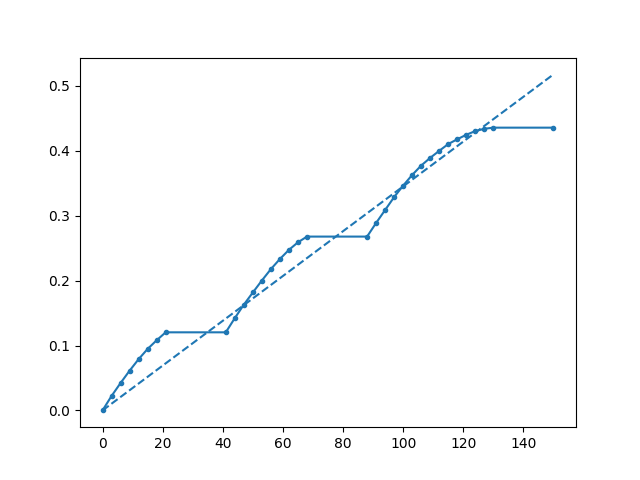

In [149]:
patch_leave_idx = pd.Index(df[subid_filt & stress_filt & tt_filt & leave_resp_filt].index)
if subid==26383 and tt_cond==5:
    patch_entry_idx = pd.Index([df[subid_filt & stress_filt & tt_filt].index[1]]+list(patch_leave_idx+1))
else:
    patch_entry_idx = pd.Index([df[subid_filt & stress_filt & tt_filt].index[0]]+list(patch_leave_idx+1))

patch_trial_idx = [list(range(i,j+1)) for (i,j) in list(zip(patch_entry_idx,patch_leave_idx))]

patch_lens = [len(i) for i in patch_trial_idx]
num_trials = sum(patch_lens)
long_patch_len = max(patch_lens)
num_patches = len(patch_trial_idx)

rel_patch_trial_idx = [np.array(i)-i[0] for i in patch_trial_idx]
rel_trial_idx = [list(np.array(i)-patch_trial_idx[0][0]) for i in patch_trial_idx]
rel_leave_idx = list(patch_leave_idx - patch_entry_idx[0])

x_data = np.array([0]+[trial_time]*num_trials)
x_data[np.array(rel_leave_idx)] = tt_cond
x_data = np.cumsum(x_data[:-1])

tot_rew = np.concatenate(([list(df.loc[i]["tot_reward"]) for i in patch_trial_idx]))

tot_rew = tot_rew-tot_rew[0]
patch_cum_rew = [list(tot_rew[i]) for i in rel_trial_idx]

# print(rel_trial_idx,'\n\n',patch_cum_rew)

y_data = tot_rew

reg = LinearRegression(fit_intercept=False).fit(x_data.reshape(-1,1),y_data.reshape(-1,1))
slope = reg.coef_; slope = slope.flatten()

c='C0'
fig,ax=plt.subplots()
ax.plot(x_data,x_data*slope,'--'+c)
ax.plot(x_data,y_data,'.-'+c,label=str(subid)+' '+str(stress_dict[stress_cond])+str(tt_dict[tt_cond]))

In [150]:
patch_rew = [np.array(i)-i[0] for i in patch_cum_rew]

#stay_lock
stay_lock_patch_rew = np.nan*np.ones((num_patches,long_patch_len))
for i in range(num_patches):
    stay_lock_patch_rew[i] = list(patch_rew[i])+(long_patch_len-len(patch_rew[i]))*[np.nan]
# print(stay_lock_patch_rew)

def neg_exp_resp(x,a,b):
    return a*(1-np.exp(-b*x))

mean_rew = np.nanmean(stay_lock_patch_rew,0)
tmp = np.sort(np.unique(patch_lens)); 
# fit_len = int(np.mean(tmp))#[len(tmp)//2-1:len(tmp)//2+2]))
fit_len = int(np.min(tmp[len(tmp)//2-1:len(tmp)//2+2]))
# fit_len = 9
print(tmp);print(fit_len)
fit_x = [0]+[trial_time]*fit_len; fit_x = np.cumsum(fit_x[:-1])

ax.plot(fit_x,mean_rew[:fit_len],'.k')

popt, pcov = curve_fit(neg_exp_resp,fit_x,mean_rew[:fit_len])
ax.plot(fit_x,neg_exp_resp(fit_x,*popt),'--k')
opt = popt
opt

# sub_popt = []
# for i in range(num_patches):
#     fit_x = [0]+[trial_time]*len(patch_rew[i]); fit_x = np.cumsum(fit_x[:-1])    
#     popt, pcov = curve_fit(neg_exp_resp,fit_x,patch_rew[i])
#     sub_popt.append(popt)
#     # ax.plot(x_data[:len(patch_cum_rew[i])],patch_cum_rew[i],'--'+c)#,label="Patch {}".format(patch_num))
#     # ax.plot(x_data[:len(patch_cum_rew[i])],neg_exp_resp(x_data[:len(patch_cum_rew[i])],*popt),'-'+c)

# sub_popt = np.array(sub_popt)
# opt = np.mean(sub_popt,0)
# opt = sub_popt[np.where(sub_popt[:,1]==max(sub_popt[:,1]))[0]][0]
# print(sub_popt[np.where(sub_popt[:,1]==max(sub_popt[:,1]))[0]],'\n',opt)

[ 9 10 15]
9


array([0.21560218, 0.03613027])

In [151]:
# patch_len = [0]+[len(i) for i in patch_cum_rew]
# patch_len = np.cumsum(patch_len)
# idxs = [np.array(range(i,j)) for (i,j) in list(zip(patch_len[:-1],patch_len[1:]))]
# print(rel_trial_idx)
# print([i for i in patch_cum_rew])
c='-C2'
y = []
for i in range(num_patches):
    x = x_data[rel_trial_idx[i]]
    patch_x = np.cumsum([trial_time]*len(rel_trial_idx[i]))
    if len(patch_x)>1:
        patch_x[-1] = patch_x[-2]+tt_cond
        patch_y = neg_exp_resp(patch_x,*opt)
        patch_y[-1]=patch_y[-2]
    else:
        patch_x[-1] = tt_cond
        patch_y=[0]
    y.append(patch_y)

#Offset rewards:
# print(y)
for i in range(1,num_patches):
    y[i]=np.array(y[i])+y[i-1][-1]
    
for i in range(num_patches):
    x = x_data[rel_trial_idx[i]]
#     ax.plot(x,y[i],'-C3')
    if i==0:
        ax.plot(x[1:],y[i][1:],c)
    else:
        ax.plot(x,y[i],c)

In [144]:
#MVT optimal calculation

def mvt_opt(n_stay,num_trials,tt_cond,opt,ax,c):
    leave_locs=[]
    while len(leave_locs)<=100:
        leave_locs+=([0]*n_stay+[1])
    leave_idxs = np.where(np.array(leave_locs)==1)[0]
    entry_idxs = np.array([0]+list(leave_idxs[:-1]+1))

    # print((trial_time*(num_trials-len(rel_leave_idx)))+len(rel_leave_idx)*tt_cond)
    t_data = ([trial_time]*(len(leave_locs)-len(leave_idxs)))
    for i in leave_idxs:
        t_data.insert(i,tt_cond)
    t_data = np.cumsum(t_data)
    
    ##Careful! Accessing global x_data to cut off t_data
    t_data = t_data[t_data<x_data[-1]]    
    leave_idxs = leave_idxs[leave_idxs<len(t_data)]
    entry_idxs = entry_idxs[entry_idxs<len(t_data)]

#     trial_idxs = [list(range(i,j)) for (i,j) in list(zip(entry_idxs[:-1],entry_idxs[1:]))]
    trial_idxs = [list(range(i,j+1)) for (i,j) in list(zip(entry_idxs,leave_idxs))]
    rel_trial_idxs = [np.array(i)-i[0] for i in trial_idxs]
    num_patch = len(trial_idxs)

    y = []
    for i in range(num_patch):
        t = t_data[rel_trial_idxs[i]]
        patch_x = np.cumsum([trial_time]*len(rel_trial_idxs[i]))
        if len(patch_x)>1:
            patch_x[-1] = patch_x[-2]+tt_cond
        else:
            patch_x[-1] = tt_cond
        patch_y = neg_exp_resp(patch_x,*opt)
        if len(patch_y)>1:    
            patch_y[-1]=patch_y[-2]
####################
        else:
            patch_y[-1]=0
####################
        y.append(patch_y)

    for i in range(1,num_patch):
        y[i]=np.array(y[i])+y[i-1][-1]

#     for i in range(num_patch):
#         t = t_data[trial_idxs[i]]
#         r = y[i]
#         ax.plot(t,r,c)
    try:
        rew = np.concatenate([i for i in y])
        reg = LinearRegression(fit_intercept=False).fit(t_data[:len(rew)].reshape(-1,1),rew.reshape(-1,1))
        slope = reg.coef_; slope = slope.flatten()
    except ValueError:
        slope = [0]
    ax.plot(t_data,slope*t_data,color=c,linewidth=1.2,label="{}".format(n_stay))
    return slope[0]

sub_num_trials = num_trials
# mvt_opt(6,sub_num_trials,tt_cond,opt,ax,'C3')
# print(((num_trials-len(rel_leave_idx))*trial_time)+len(rel_leave_idx)*tt_cond)
# print(x_data[-1])

c='C0'
per_patch_stay = np.arange(1,30)
cum_res = []
for i in per_patch_stay:
    n_rate = mvt_opt(i,sub_num_trials,tt_cond,opt,ax,colors(i))
    cum_res.append(n_rate)
ax.legend()

In [145]:
# n_stay=21

# leave_locs=[]
# while len(leave_locs)<=100:
#     leave_locs+=([0]*n_stay+[1])

# leave_idxs = np.where(np.array(leave_locs)==1)[0]
# entry_idxs = np.array([0]+list(leave_idxs[:-1]+1))

# t_data = ([trial_time]*(len(leave_locs)-len(leave_idxs)))
# for i in leave_idxs:
#     t_data.insert(i,tt_cond)
# t_data = np.cumsum(t_data)

# ##Careful! Accessing global x_data to cut off t_data
# ##Could use block time calculation below, but need to input len(leave_idx) or num_patches of sub
# ## print((trial_time*(num_trials-len(rel_leave_idx)))+len(rel_leave_idx)*tt_cond)
# t_data = t_data[t_data<x_data[-1]]
# leave_idxs = leave_idxs[leave_idxs<len(t_data)]
# entry_idxs = entry_idxs[entry_idxs<len(t_data)]
# # print(entry_idxs,leave_idxs)

# # trial_idxs = [list(range(i,j)) for (i,j) in list(zip(entry_idxs[:-1],entry_idxs[1:]))]
# trial_idxs = [list(range(i,j+1)) for (i,j) in list(zip(entry_idxs,leave_idxs))]
# # print(trial_idxs)
# rel_trial_idxs = [np.array(i)-i[0] for i in trial_idxs]
# num_patch = len(trial_idxs)

# y = []
# for i in range(num_patch):
#     t = t_data[rel_trial_idxs[i]]
#     patch_x = np.cumsum([trial_time]*len(rel_trial_idxs[i]))
#     if len(patch_x)>1:
#         patch_x[-1] = patch_x[-2]+tt_cond
#     else:
#         patch_x[-1] = tt_cond
#     patch_y = neg_exp_resp(patch_x,*opt)
#     if len(patch_y)>1:    
#         patch_y[-1]=patch_y[-2]
#     y.append(patch_y)

# print(num_patch,y)

# #Offset rewards:
# for i in range(1,num_patch):
#     y[i]=np.array(y[i])+y[i-1][-1]

# # fig,ax=plt.subplots()
# for i in range(num_patch):
#     x = t_data[trial_idxs[i]]
# #     ax.plot(x,y[i],'-C3')    

MVT optimal number of stay trials per patch: 19


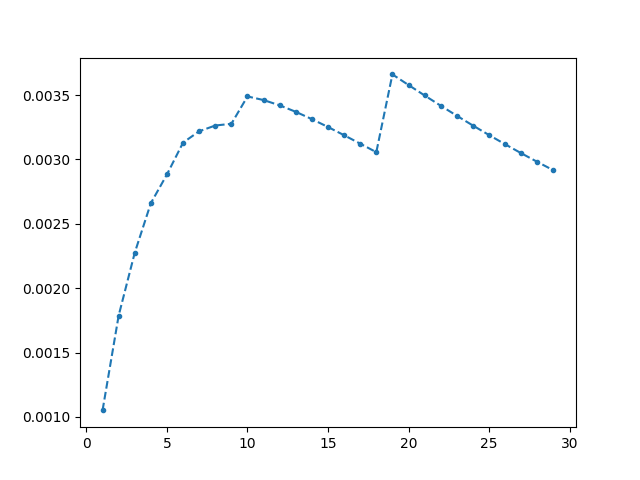

In [152]:
fig2,ax2 = plt.subplots()
ax2.plot(per_patch_stay[:len(cum_res)],cum_res,'.--')
print("MVT optimal number of stay trials per patch:",per_patch_stay[np.where(cum_res==max(cum_res))[0][0]])
# print(cum_res)

In [101]:
plt.close()